# How to spinup in USP mode

In [1]:
from pyclmuapp import usp_clmu
import os

## spinup case

Run 10 year for spinup

The default SET `RUN_TYPE="coldstart"`, the parameters will set to be in a cold state.

In [2]:
usp = usp_clmu(
    pwd=os.getcwd(),)

usp.check_domain()
usp.check_forcing(
    usr_forcing="inputfolder/Urban-PLUMBER/datm_files/UK-Kin/CLM1PT_data/forcing.nc")
usp_spinup = usp.run(
            output_prefix= "_clm.nc",
            case_name = "usp_spinup", 
            RUN_STARTDATE = "2002-01-01",
            STOP_OPTION = "nyears", 
            STOP_N = "10",
            RUN_TYPE= "coldstart",
            iflog = True,
            logfile = "log.log",
            run_tyep="usp-exec"#"case", when docker container is not start)
        )
usp_spinup

Folder 'inputfolder' already exists.
Folder 'outputfolder' already exists.
Folder 'logfolder' already exists.
Folder 'scriptsfolder' already exists.
Folder '/Users/user/Documents/GitHub/pyclmuapp/inputfolder/usp' created successfully!
Copying the file forcing.nc to the /Users/user/Documents/GitHub/pyclmuapp/inputfolder/usp


['/Users/user/Documents/GitHub/pyclmuapp/outputfolder/lnd/hist/usp_spinup_clm0_2024-07-30_14-45-42_clm.nc']

In [3]:
usp.nc_view()

<xarray.Dataset>
Dimensions:             (levgrnd: 25, levlak: 10, levdcmp: 1, time: 175297,
                         hist_interval: 2, lndgrid: 1, column: 6, gridcell: 1,
                         landunit: 2, pft: 6, levsoi: 20)
Coordinates:
  * levgrnd             (levgrnd) float32 0.01 0.04 0.09 ... 19.48 28.87 42.0
  * levlak              (levlak) float32 0.05 0.6 2.1 4.6 ... 25.6 34.33 44.78
  * levdcmp             (levdcmp) float32 1.0
  * time                (time) datetime64[ns] 2002-01-01 ... 2012-01-01
Dimensions without coordinates: hist_interval, lndgrid, column, gridcell,
                                landunit, pft, levsoi
Data variables: (12/126)
    mcdate              (time) int32 ...
    mcsec               (time) int32 ...
    mdcur               (time) int32 ...
    mscur               (time) int32 ...
    nstep               (time) int32 ...
    time_bounds         (time, hist_interval) datetime64[ns] ...
    ...                  ...
    URBAN_AC            (time, gridcell) float32 ...
    URBAN_HEAT          (time, gridcell) float32 ...
    WASTEHEAT           (time, gridcell) float32 ...
    WBT                 (time, gridcell) float32 ...
    Wind                (time, gridcell) float32 ...
    ZWT                 (time, gridcell) float32 ...
Attributes: (12/38)
    title:                                     CLM History file information
    comment:                                   NOTE: None of the variables ar...
    Conventions:                               CF-1.0
    history:                                   created on 07/30/24 13:41:09
    source:                                    Community Land Model CLM4.0
    hostname:                                  clmu-app
    ...                                        ...
    ctype_urban_shadewall:                     73
    ctype_urban_impervious_road:               74
    ctype_urban_pervious_road:                 75
    cft_c3_crop:                               1
    cft_c3_irrigated:                          2
    time_period_freq:                          minute_30

## startup

In [4]:
usp = usp_clmu(
    pwd=os.getcwd(),)

usp.check_domain()
usp.check_forcing(
    usr_forcing="inputfolder/Urban-PLUMBER/datm_files/UK-Kin/CLM1PT_data/forcing.nc")
usp_london_start = usp.run(
            output_prefix= "_clm.nc",
            case_name = "usp_start", 
            RUN_STARTDATE = "2012-01-01",
            STOP_OPTION = "nyears", 
            STOP_N = "2",
            RUN_TYPE= "branch",
            RUN_REFCASE= "usp_spinup",
            RUN_REFDATE= "2012-01-01",
            iflog = True,
            logfile = "log.log",
            run_tyep="usp-exec"#"case", when docker container is not start)
        )
usp_london_start

Folder 'inputfolder' already exists.
Folder 'outputfolder' already exists.
Folder 'logfolder' already exists.
Folder 'scriptsfolder' already exists.
Folder '/Users/user/Documents/GitHub/pyclmuapp/inputfolder/usp' already exists.
Copying the file forcing.nc to the /Users/user/Documents/GitHub/pyclmuapp/inputfolder/usp


['/Users/user/Documents/GitHub/pyclmuapp/outputfolder/lnd/hist/usp_start_clm0_2024-07-30_14-47-28_clm.nc']

## no spinup

In [5]:
usp = usp_clmu(
    pwd=os.getcwd(),)

usp.check_domain()
usp.check_forcing(
    usr_forcing="inputfolder/Urban-PLUMBER/datm_files/UK-Kin/CLM1PT_data/forcing.nc")
usp_london_start_no = usp.run(
            output_prefix= "_clm.nc",
            case_name = "usp_start_no", 
            RUN_STARTDATE = "2012-01-01",
            STOP_OPTION = "nyears", 
            STOP_N = "2",
            RUN_TYPE= "coldstart",
            RUN_REFCASE= "usp_spinup",
            RUN_REFDATE= "2012-01-01",
            iflog = True,
            logfile = "log.log",
            #var_add= "'Qle','Qh','Qtau','Qstor','Rnet','SWup','LWup'",
            run_tyep="usp-exec"#"case", when docker container is not start)
        )
usp_london_start_no

Folder 'inputfolder' already exists.
Folder 'outputfolder' already exists.
Folder 'logfolder' already exists.
Folder 'scriptsfolder' already exists.
Folder '/Users/user/Documents/GitHub/pyclmuapp/inputfolder/usp' already exists.
Copying the file forcing.nc to the /Users/user/Documents/GitHub/pyclmuapp/inputfolder/usp


['/Users/user/Documents/GitHub/pyclmuapp/outputfolder/lnd/hist/usp_start_no_clm0_2024-07-30_14-49-11_clm.nc']

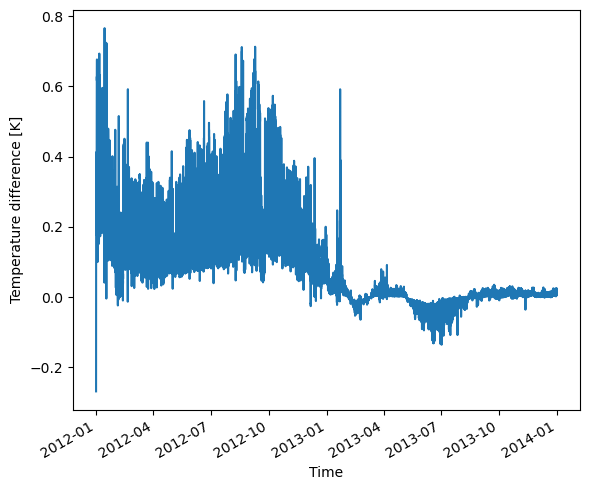

<xarray.DataArray 'TSA' ()>
array(285.07147, dtype=float32)
<xarray.DataArray 'TSA' ()>
array(284.97766, dtype=float32)


In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)
usp_london_start_no_nc=usp.nc_view(usp_london_start[0])
usp_london_start_nc=usp.nc_view(usp_london_start_no[0])
#usp_london_start_no_nc['TSA_U'].plot()
#usp_london_start_nc['TSA_U'].plot()
diff = usp_london_start_no_nc['TSA']-usp_london_start_nc['TSA']
diff.plot(ax=ax)
ax.set_ylabel('Temperature difference [K]')
ax.set_xlabel('Time')
plt.tight_layout()
plt.savefig('figs/usp_london_spinuptest.pdf', dpi=300)
plt.show()
print(usp_london_start_no_nc['TSA'].mean())
print(usp_london_start_nc['TSA'].mean())